<h1 align='center'> 영상처리 프로그래밍 실습 6</h1>

<h6 align='right'> 2022. 4. 14. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 18일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [3]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 지난 주 문제 1.

다음 조건을 모두 만족하는 프로그램을 작성하라.

- 'clock_150.jpg' 파일을 읽고, cv2.imshow 함수를 이용하여 "Clock" title을 가진 윈도우에 영상을 표시한다.
- "Clock" 윈도우 위에 마우스 오른쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 확대된다. 단, 최대 5 배 이상을 넘으면 더 이상 영상은 확대되지 않는다.
- "Clock" 윈도우 위에 마우스 왼쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 축소된다. 단, 원래 영상 크기보다 작아지면 안된다.
- 다음 숫자를 누르면 영상 확대 시 interpolation 옵션은 키보드의 숫자를 눌러서 지정한다.
  - 1: Nearest-neighbor interpolation
  - 2: Bilinear interpolation
  - 3: Cubic interpolation 

In [16]:
def onMouse(event, x, y, flags, param):
    global img2, val
     
    if event == cv2.EVENT_RBUTTONDOWN:
        if val < MAX_VAL:
            val = val + 1
    elif event == cv2.EVENT_LBUTTONDOWN:
        if val > 1: 
            val = val - 1
    width = img.shape[1]*val
    height = img.shape[0]*val
    cv2.resizeWindow(winName, width, height)
    img2 = cv2.resize(img, (height, width), cv2.INTER_LINEAR)
    cv2.imshow(winName, img2)


def get_top_left_coordinate(val):
    space_x = (WIDTH - img.shape[1]*val)
    space_y = (HEIGHT - img.shape[0]*val)
    return space_x//2, space_y//2


file_name = 'clock_150.jpg'
img = cv2.imread(file_name)
val = 1
MAX_VAL = 5

img2 = img.copy()

winName = "Up-sampling an image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)

cv2.setMouseCallback(winName, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 예제 1. 
bird.jpg' 파일을 읽고, 이 영상의 R, G, B 성분의 히스토그램을 그래프로 표시하라.
### 1.1 NumnPy 배열로부터 직접 히스토그램을 구하는 방법


In [2]:
bird = cv2.imread('bird.png')

In [3]:
bird.shape, bird.min(), bird.max()

((425, 640, 3), 0, 255)

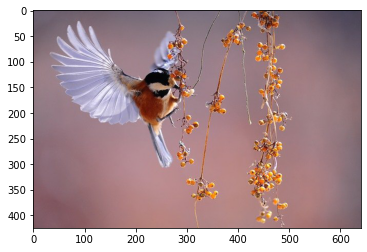

In [4]:
plt.imshow(bird[:,:,::-1])

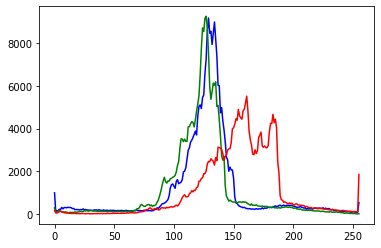

In [5]:
hist_B = [bird[...,0][bird[...,0] == n].size  for n in range(256)]
hist_G = [bird[...,1][bird[...,1] == n].size  for n in range(256)]
hist_R = [bird[...,2][bird[...,2] == n].size  for n in range(256)]

plt.plot(range(256), hist_B, 'b')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_R, 'r')
plt.show()

### 1.2 skimage.exposure 모듈의 histogram을 이용한 방법

histogram(이미지)
* Returns
    > hist : array

        히스토그램의 값.
    
    > bin_centers : array
    
        bin의 중간 값들

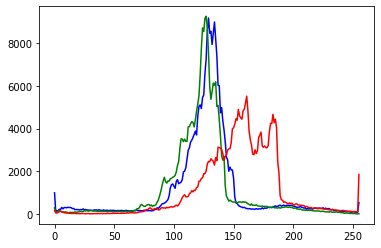

In [76]:
from skimage.exposure import histogram
hist_B, hist_center_B = histogram(bird[...,0])
hist_G, hist_center_G = histogram(bird[...,1])
hist_R, hist_center_R = histogram(bird[...,2])
plt.plot(hist_center_B,hist_B, 'b')
plt.plot(hist_center_G, hist_G,'g')
plt.plot(hist_center_R, hist_R,'r')
plt.show()

### 1.3 OpenCV의 calcHist를 이용한 방법

### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
* Parameters
    > image : 분석대상 이미지. 인자는 반드시 [ ]로 둘러싸야 함.

    > channels : 분석 채널(x축의 대상). 이미지가 grayscale이면 [0], color이미지면([0]:blue,[1]:green,[2]:red)

    > mask : 이미지의 분석영역. None이면 전체 영역

    > hintSize : BIN값. [256]

    > ranges : Range값. [0,256]


In [12]:
hist_B = cv2.calcHist([bird], [0], None, [256], [0,256])
hist_G = cv2.calcHist([bird], [1], None, [256], [0,256])
hist_R = cv2.calcHist([bird], [2], None, [256], [0,256])

In [10]:
hist_B.shape

(256, 1)

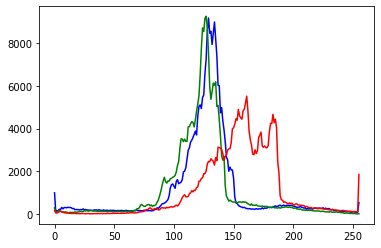

In [13]:
plt.plot(range(256), hist_B, 'b')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_R, 'r')
plt.show()

## 예제 2.
영상의 로그 변환은 다음과 같은 식으로 표현된다.

$$ g(x,y) = \frac{255}{\log(1+\max\{f(x,y)\}} \log\{1+f(x,y)\}$$

* 영상의 특정 범위의 화솟값을 압축하거나 늘일 필요가 있을 때 사용
* 영상의 프리에 스펙트럼의 크기 성분을 표시할 때 사용

### 2.1 
로그 변환 함수의 그래프를 그려라.

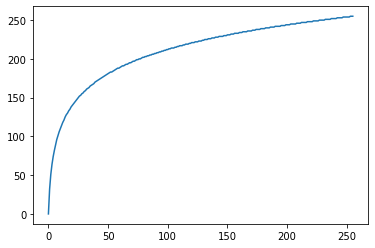

In [12]:
def log_transformation(r):
    C = 255 / np.log(256)
    s = (C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)
    return s

r = np.arange(256)
s = log_transformation(r)
plt.plot(r,s)
plt.show()

### 2.2 
Lookup table 방식을 이용한 로그 변환 함수를 작성하라.

1. 룩업 테이블이란?
룩업테이블은 주어진 연산에 대해 미리 계산된 결과들의 집합(배열)을 가리킨다. 이집합은 주어진 연산에 대한 결과를 계산하는 시간보다 더 빠르게 값을 취득해 갈 수 있도록 사용되는 레퍼런스로 사용된다.

In [5]:
def lookupTable(r, lut):
    return lut[r]

C = 255 / np.log(256)
# s = (C*np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)
log_lut = np.array([(C * np.log(1. + r)).round(0).clip(0,255).astype(np.uint8)\
     for r in range(256)])

In [6]:
log_lut

array([  0,  32,  51,  64,  74,  82,  89,  96, 101, 106, 110, 114, 118,
       121, 125, 128, 130, 133, 135, 138, 140, 142, 144, 146, 148, 150,
       152, 153, 155, 156, 158, 159, 161, 162, 163, 165, 166, 167, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 183, 184, 185, 186, 187, 188, 188, 189, 190, 191, 191, 192,
       193, 193, 194, 195, 195, 196, 197, 197, 198, 199, 199, 200, 200,
       201, 202, 202, 203, 203, 204, 204, 205, 205, 206, 206, 207, 207,
       208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 213, 213, 214,
       214, 214, 215, 215, 216, 216, 217, 217, 217, 218, 218, 219, 219,
       219, 220, 220, 221, 221, 221, 222, 222, 222, 223, 223, 223, 224,
       224, 225, 225, 225, 226, 226, 226, 227, 227, 227, 228, 228, 228,
       229, 229, 229, 229, 230, 230, 230, 231, 231, 231, 232, 232, 232,
       233, 233, 233, 233, 234, 234, 234, 235, 235, 235, 235, 236, 236,
       236, 236, 237, 237, 237, 238, 238, 238, 238, 239, 239, 23

### 2.3 
- bird.png, forest.jpg, grass.jpg 영상에 log 변환을 적용한 후에 원 영상과 변환 영상을 나란히 표시하라. (단, BGR 영상을 다음 몇 가지 color 공간으로 변환한 후에 특정 성분만 변환한 후에 다시 BGR 성분으로 변환하는 방법도 사용하라.)
  - RGB
  - Luv
  - Lab
  - YUV

- 위에서 사용한 변환 전 후 영상의 R, G, B 성분별 히스토그램을 비교하라.

In [20]:
cv2dir = dir(cv2)
[e for e in cv2dir if 'COLOR_' in e]

['CAP_PROP_XI_COLOR_FILTER_ARRAY',
 'COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_BGGR2BGR',
 'COLOR_BAYER_BGGR2BGRA',
 'COLOR_BAYER_BGGR2BGR_EA',
 'COLOR_BAYER_BGGR2BGR_VNG',
 'COLOR_BAYER_BGGR2GRAY',
 'COLOR_BAYER_BGGR2RGB',
 'COLOR_BAYER_BGGR2RGBA',
 'COLOR_BAYER_BGGR2RGB_EA',
 'COLOR_BAYER_BGGR2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GBRG2BGR',
 'COLOR_BAYER_GBRG2BGRA',
 'COLOR_BAYER_GBRG2BGR_EA',
 'COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BA

In [8]:
def show_two_images(img1, img2):
    if img1.ndim != 3 and img2.ndim != 3: # 흑백영상일 경우
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.imshow(img1, cmap='gray')
        plt.subplot(122)
        plt.imshow(img2, cmap='gray')
        plt.show()
    else: # 컬러영상일 경우
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        plt.imshow(img1[...,::-1])
        plt.subplot(122)
        plt.imshow(img2[...,::-1])
        plt.show()

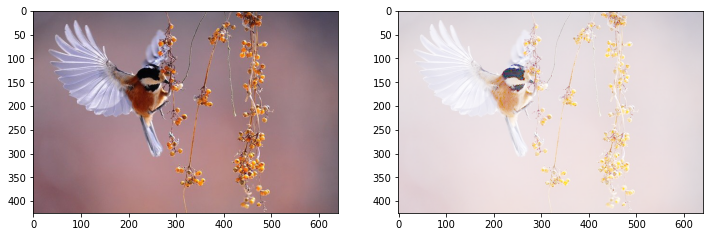

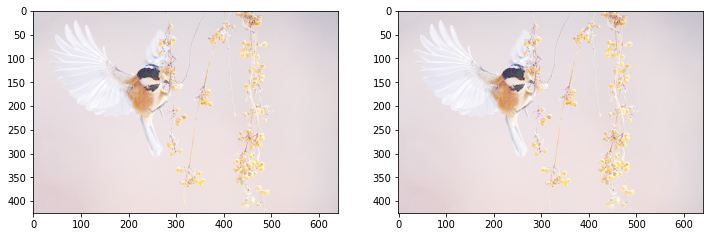

In [13]:
bird = cv2.imread('bird.png')
bird_log = lookupTable(bird, log_lut) # log변환
bird_log2 = log_transformation(bird)
show_two_images(bird, bird_log)


array([[[109,  92, 103],
        [109,  92, 103],
        [109,  92, 103],
        ...,
        [ 88,  71,  75],
        [ 86,  69,  73],
        [ 81,  64,  68]],

       [[108,  92, 103],
        [108,  92, 103],
        [109,  93, 104],
        ...,
        [ 87,  70,  74],
        [ 86,  69,  73],
        [ 83,  66,  70]],

       [[109,  93, 104],
        [109,  93, 104],
        [109,  93, 104],
        ...,
        [ 86,  69,  73],
        [ 85,  68,  72],
        [ 86,  69,  73]],

       ...,

       [[ 92,  85, 120],
        [ 92,  85, 120],
        [ 92,  85, 120],
        ...,
        [104,  95, 115],
        [102,  93, 113],
        [100,  91, 111]],

       [[ 92,  85, 118],
        [ 92,  85, 118],
        [ 92,  85, 118],
        ...,
        [104,  95, 115],
        [103,  94, 114],
        [101,  92, 112]],

       [[ 92,  85, 118],
        [ 93,  86, 119],
        [ 93,  86, 119],
        ...,
        [103,  94, 114],
        [103,  94, 114],
        [103,  94, 114]]

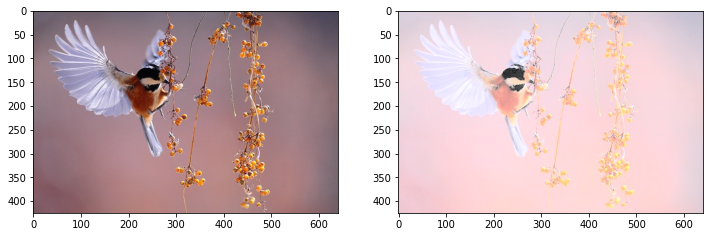

In [28]:
bird_Luv = cv2.cvtColor(bird, cv2.COLOR_BGR2Luv) # BGR -> LUV
bird_Luv[...,0] = lookupTable(bird_Luv[...,0], log_lut) # L 성분만 변환
bird_Luv_log = cv2.cvtColor(bird_Luv, cv2.COLOR_Luv2BGR) # LUV -> BGR
show_two_images(bird, bird_Luv_log)

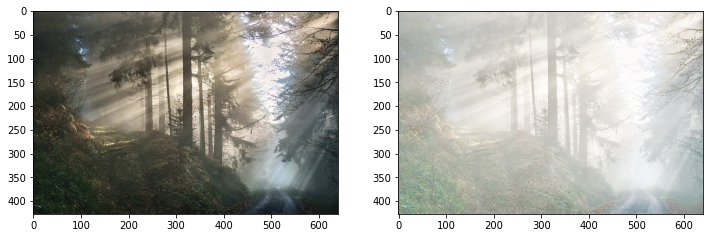

In [26]:
forest = cv2.imread("forest.jpg")
forest_log = lookupTable(forest, log_lut)
show_two_images(forest, forest_log)

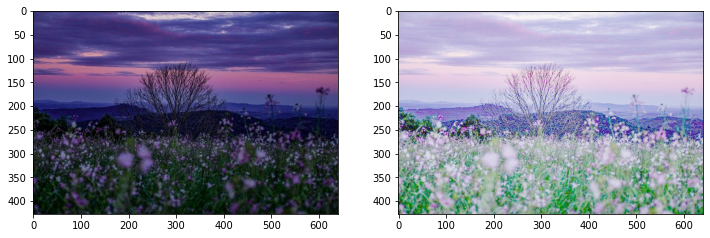

In [27]:
grass = cv2.imread("grass.jpg")
grass_log = lookupTable(grass, log_lut)
show_two_images(grass, grass_log)

## 예제 3.
영상의 gamma 변환은 다음과 같은 식으로 표현된다.

$$s = 255^{1-\gamma} c^\gamma$$

### 2.1 
아래 gamma 값에 대해서 감마 변환 함수의 그래프를 그려라.

$$\gamma = 1/4, 1/3, 1/2, 1, 3/2, 2, 5/2$$

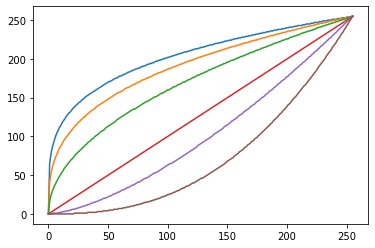

In [40]:
def gamma_lut(gamma):
    out = 255**(1-gamma)*np.arange(256)**gamma
    return out.round(0).clip(0,255).astype(np.uint8)
    # round(0) 반올림
    # clip(0,255) : 0이하의 값을 0으로 255이상 값을 255로 

gammas = (1/4, 1/3, 1/2, 1, 3/2, 5/2)

for n, gamma in enumerate(gammas):
    s = gamma_lut(gamma)
    plt.plot(r,s)

### 3.2
cv2.imread 함수를 이용해서 'grass.jpg' 파일을 읽고, gamma 값을 조정하면서 gamma 변환한 영상을 표시하라.

In [41]:
grass = cv2.imread('grass.jpg')

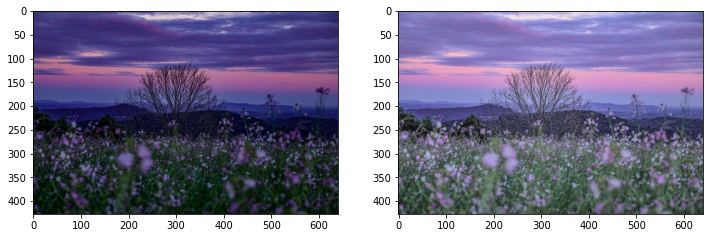

In [46]:
lut_gamma = gamma_lut(0.5)

grass_YUV = cv2.cvtColor(grass, cv2.COLOR_BGR2YUV)
grass_YUV[...,0] = lookupTable(grass_YUV[...,0], lut_gamma)
grass_YUV_gamma = cv2.cvtColor(grass_YUV, cv2.COLOR_YUV2BGR)

show_two_images(grass, grass_YUV_gamma)


In [ ]:
help(cv2.circle)

## 예제 4.
다음 세 가지 방법으로 구현한 감마 변환 함수의 평균 실행 시간을 비교하는 프로그램을 작성하라.
- 영상을 표현하는 NumPy 배열에 직접 감마 변환 연산을 적용하는 경우
- NumPY 배열로 lookup table을 만들고, boolean indexing을 이용하는 경우
- OpenCV의 LUT 함수를 사용하는 경우

In [ ]:
# 1


In [ ]:
# 2


In [ ]:
# 3


## 예제 5.
- 'basement.jpg' 파일을 읽고 히스토그램 평활화를 적용한 영상을 만들고, 원 영상과 나란히 표시하라.
  - 컬러 영상을 직접 히스토그램 평활화한 영상과 컬러 공간을 변경한 후에 특정 성분에만 히스토그램 평활화한 영상과 특성을 비교하라.
- 히스토그램 평활화 전, 후의 영상의 컬러 히스토그램을 그려라.

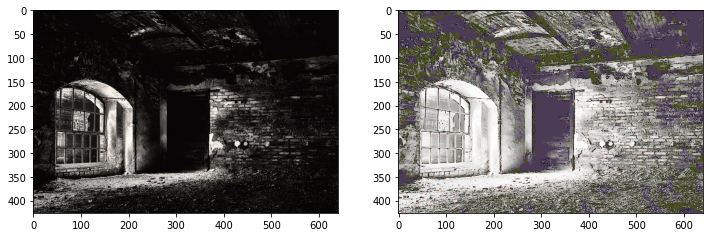

In [11]:
basement = cv2.imread('basement.jpg')
basement_eq = np.empty_like(basement)
basement_eq[...,0] = cv2.equalizeHist(basement[...,0])
basement_eq[...,1] = cv2.equalizeHist(basement[...,1])
basement_eq[...,2] = cv2.equalizeHist(basement[...,2])
show_two_images(basement, basement_eq)

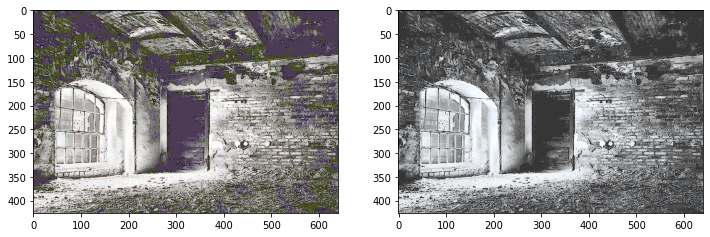

In [14]:
# 컬러 영상을 직접 히스토그램 평활화한 영상과 컬러 공간을 변경한 후에 특정 성분에만 
# 히스토그램 평활화한 영상과 특성을 비교

# RGB -> LUV
basement_LUV = cv2.cvtColor(basement, cv2.COLOR_BGR2LUV)
# L 성분에만 히스토그램 평활화 적용
basement_LUV[...,0] = cv2.equalizeHist(basement_LUV[...,0])
basement_LUV_eq = cv2.cvtColor(basement_LUV, cv2.COLOR_LUV2RGB)
show_two_images(basement_eq,basement_LUV_eq)


C:\Users\dldms\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


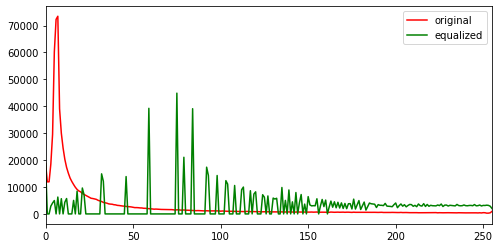

In [74]:
plt.figure(figsize=(8,4))
hist, hist_center = histogram(basement)
hist_eq, hist_center_eq = histogram(basement_eq)
plt.plot(hist_center, hist, 'r', label='original')
plt.plot(hist_center_eq, hist_eq, 'g', label='equalized')
plt.xlim(0,255)
plt.legend()
plt.show()

## 문제 1.
오늘 실습에서 사용한 적당한 영상을 하나 읽어서 OpenCV를 이용해서 영상을 표시하는 윈도우를 만들고 slidebar 인터페이스를 사용하여 감마 변환의 gamma를 0.1부터 5 사이로 조절할 수 있도록 하고, 감마가 변경될 때마다 윈도우에 감마 변환된 영상이 표시되는 프로그램을 작성하라.

In [16]:
def gammaChanger(gamma):
    if(gamma == 0):
        return
    out = img.copy()
    out = ((out/255) ** (1/(gamma/10)))*255
    out = out.astype(np.uint8)
    cv2.imshow("Forest", out)

img = cv2.imread('forest.jpg')
cv2.imshow("Forest", img)
cv2.createTrackbar('gamma',"Forest",1,50, gammaChanger)
cv2.waitKey(0)
cv2.destroyAllWindows()